In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('girnar1.jpg', cv.IMREAD_GRAYSCALE)

hProj = np.sum(img,1)

# Create output image same height as text, 500 px wide
m = np.max(hProj)
w = 500
result = np.zeros((hProj.shape[0],500))

# Draw a line for each row
for row in range(img.shape[0]):
   cv.line(result, (0,row), (int(hProj[row]*w/m),row), (255,255,255), 1)

# Save result
cv.imwrite('hProj.png', result)

print(hProj)

[55680 57069 56902 56912 56870 56581 54485 53498 48066 46513 50921 51310
 49811 49274 49186 47041 43499 49869 55115 55861 54037 48225 46787 49895
 48681 48662 48859 47541 46524 46713 52096 54988 54283 50899 45417 50540
 52179 50315 47298 47540 48709 48572 48070 52178 53711 52596 50168 49609
 49041 48985 47673 45567 46028 46039 49642 52794 54814 53410 48515 47465
 47861 47465 45972 46659 45591 43023 44104 45733 49385 52571 54524 50355
 47287 48047 47672 46086 45612 44517 42278 45288 48582 53607 54682 50317
 45210 47746 48571 48531 46817 46475 43363 42902 49482 53396 54926 53970
 50517 47625 47354 47577 46101 45181 44114 42373 44765 51405 54547 54593
 48658 47303 49801 49059 44466 45634 43275 38866 44422 51621 52365 52430
 48061 44337 44541 45567 44775 42991 43959 43785 50409 54968 55940 51532
 45842 47309 42874 46186 43646 41175 44823 44853 47461 50660 53401 53094
 48843 44943 45249 46300 44465 43612 44710 42675 43364 47880 54460 57019
 57074 57078]


In [21]:
vProj = np.sum(img,0)

# Create output image same height as text, 500 px wide
m = np.max(hProj)
w = 500
result = np.zeros((500,vProj.shape[0]))

# Draw a line for each row
for col in range(img.shape[1]):
   cv.line(result, (col,0), (col, int(vProj[col]*w/m)), (255,255,255), 1)

# Save result
cv.imwrite('vProj.png', result)

print(vProj)

[40290 40290 40287 40284 40279 40275 40272 40271 39805 39457 39143 37246
 36568 36607 37042 37301 37291 37170 38489 39242 38822 37331 37117 37265
 36678 36344 35435 36455 36240 36004 36665 36233 34421 31942 34498 35559
 34897 33143 32736 31537 32978 32621 32060 34265 34989 35414 36485 36721
 32459 29886 30931 29807 30383 32256 33918 35269 35802 35963 33132 35080
 32944 29598 29551 31552 32155 32856 34456 32693 31553 33214 33288 33814
 34647 32395 31256 30085 34061 34568 33540 35665 32817 32871 33496 34478
 33745 32087 33402 35405 35710 34183 34756 35780 33701 31811 31478 31889
 28705 29448 32228 35282 35538 36986 36124 34626 34941 29125 31033 33554
 33117 31804 33892 33943 34847 36599 35976 35130 36276 34218 32170 30789
 26656 29656 32462 31991 34225 36831 37566 36504 37725 37713 35864 32564
 31361 30306 30579 30505 29647 31657 34233 36671 36662 34331 34868 32251
 33749 34276 32071 31898 34563 34625 36186 35802 34481 30755 33288 33633
 32843 31875 32824 31981 32338 33812 35153 36448 34

57078 38866 45530.0
[[16, 43499], [34, 45417], [65, 43023], [66, 44104], [77, 44517], [78, 42278], [79, 45288], [84, 45210], [90, 43363], [91, 42902], [101, 45181], [102, 44114], [103, 42373], [104, 44765], [112, 44466], [114, 43275], [115, 38866], [116, 44422], [121, 44337], [122, 44541], [124, 44775], [125, 42991], [126, 43959], [127, 43785], [134, 42874], [136, 43646], [137, 41175], [138, 44823], [139, 44853], [145, 44943], [146, 45249], [148, 44465], [149, 43612], [150, 44710], [151, 42675], [152, 43364]]


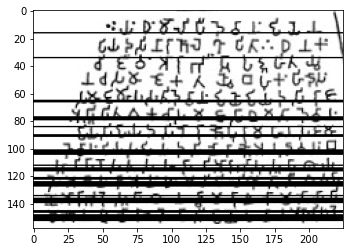

In [46]:
def find_peak_regions(hpp, divider=0.4):
    threshold = (np.max(hpp)-np.min(hpp))/divider
    print(max(hpp), min(hpp), threshold)
    peaks = []
    peaks_index = []
    for i, hppv in enumerate(hpp):
        if hppv < threshold:
            peaks.append([i, hppv])
    return peaks

peaks = find_peak_regions(hProj)
print(peaks)

peaks_index = np.array(peaks)[:,0].astype(int)

segmented_img = np.copy(img)
r,c = segmented_img.shape
for ri in range(r):
    if ri in peaks_index:
        segmented_img[ri, :] = 0
        
plt.figure()
plt.imshow(segmented_img, cmap="gray")
plt.show()

